In [18]:
import cocpit
import matplotlib.pyplot as plt
import torch
from cocpit import config as config
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Override matplotlib default styling.
plt_params = {
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "legend.title_fontsize": 14,
    "legend.fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [21]:
#  make predictions on each batch of images,
#  and concatenate the precitions across batches
p = cocpit.predictions.LoaderPredictions()
with torch.no_grad():
    for fold in range(config.KFOLD+1):
        model = p.load_model(fold)
        val_loader = p.load_val_loader(fold)
        for ((imgs, labels, paths), batch) in val_loader:
            b = cocpit.predictions.BatchPredictions(imgs, model)
            b.find_max_preds()
            b.top_k_preds(len(config.CLASS_NAMES))
            p.append_batch(b, paths, labels)
p.concatenate_loader_vars()

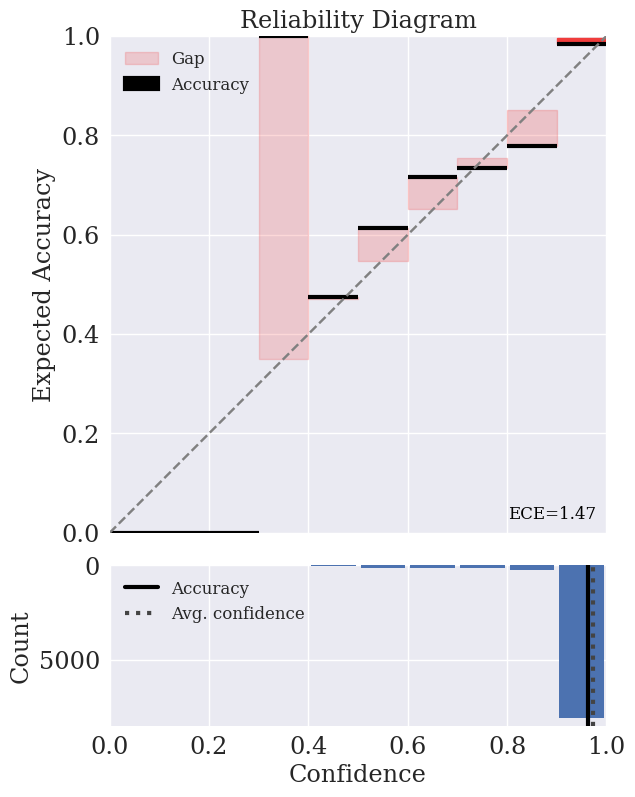

In [24]:
fig = cocpit.plotting_scripts.reliability.reliability_diagram(np.array([i.item() for i in p.labels]), np.array(p.max_preds), np.array([i[0] for i in p.topk_probs]), num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title='Reliability Diagram', figsize=(6, 6), dpi=100, 
                          return_fig=True)